<a href="https://colab.research.google.com/github/chennamsettyanitha/movie-genre-classification/blob/main/movie_genreclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, precision_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize

In [ ]:
train_data = pd.read_csv('/content/train_data.txt', sep=' ::: ', engine='python', header=None)
test_data = pd.read_csv('/content/test_data.txt', sep=' ::: ', engine='python', header=None)
test_data_solution = pd.read_csv('/content/test_data_solution.txt', sep=' ::: ', engine='python', header=None)
# print(test_data)
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [ ]:
train_title = train_data.iloc[:,1]
train_genre = train_data.iloc[:,2]
train_description = train_data.iloc[:,3]

test_title = test_data.iloc[:,1]
test_description = test_data.iloc[:,2]
# train_title.head()

train_text_features = train_title + ' ' + train_description
test_text_features = test_title + ' ' + test_description

In [ ]:
# vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)    # TO limit the no. of features, to sace computation time. Since Logistice Regretion takes longer time (since, iterative)

In [ ]:
x_train = vectorizer.fit_transform(train_text_features)
# print(x_train)
y_train = train_genre

x_test = vectorizer.transform(test_text_features)

In [ ]:
# using training data
clf = MultinomialNB()   # object clf created of the Class MultinomialNB() - (in scikit-learn)
clf.fit(x_train, y_train)    # fit method is called/used using clf obj.

MultinomialNB()

In [ ]:
test_genre = test_data_solution.iloc[:,2]
y_test = test_genre

In [ ]:
# using test data
y_pred = clf.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred, zero_division=0))
print("Precision: ", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.525830258302583
Classification Report: 
              precision    recall  f1-score   support

      action       0.59      0.12      0.20      1314
       adult       0.51      0.06      0.11       590
   adventure       0.74      0.06      0.12       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.52      0.42      0.47      7446
       crime       0.00      0.00      0.00       505
 documentary       0.57      0.88      0.69     13096
       drama       0.46      0.83      0.59     13612
      family       0.67      0.00      0.01       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.98      0.32      0.48       193
     history       0.00      0.00      0.00       243
      horror       0.70      0.37      0.49      2204
       music       0.78      0.14      0.23       731
     musical       0.00      0.00      0.00       276
     mystery       0.00     

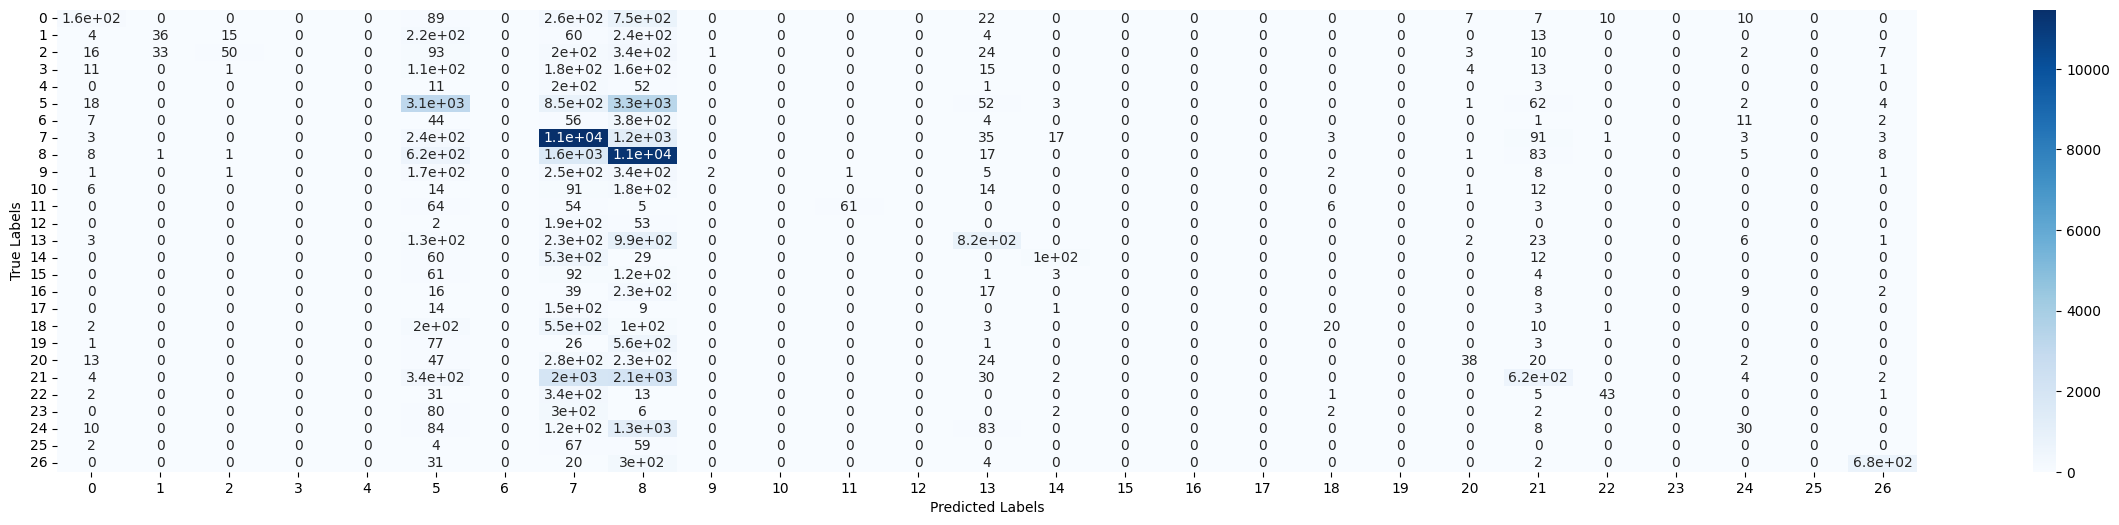

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(30,6))

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
f1_scores = [report[x]["f1-score"] for x in report.keys() if x != "accuracy" and x != "macro avg" and x != "weighted avg"]

In [ ]:
class_labels = [x for x in report.keys() if x != "accuracy" and x != "macro avg" and x != "weighted avg"]

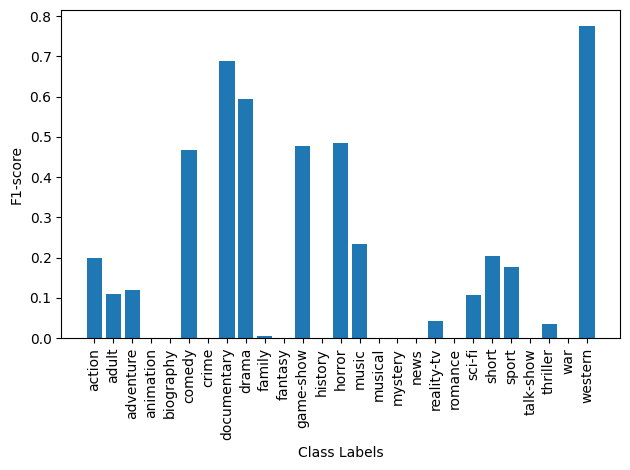

In [ ]:
plt.bar(class_labels, f1_scores)
plt.xlabel("Class Labels")
plt.ylabel("F1-score")
plt.xticks(rotation=90)    # rotates the x-axis labels for better readability
plt.tight_layout()    # Adjust the layout to fit the labels
plt.show()

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = clf.predict_proba(x_test)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, 0], y_pred_proba[:, 0])

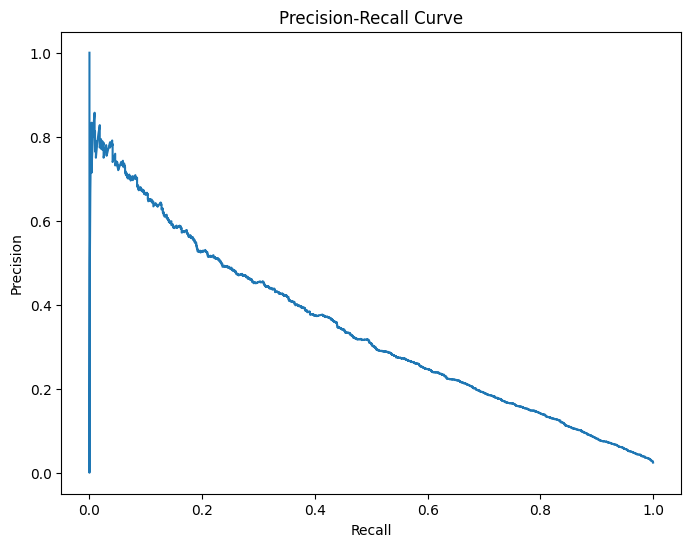

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
class_counts = y_test.value_counts()

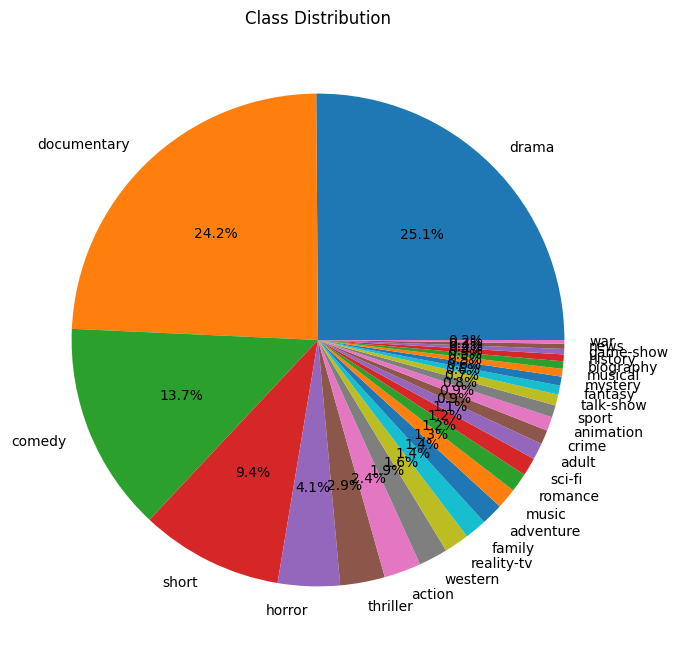

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

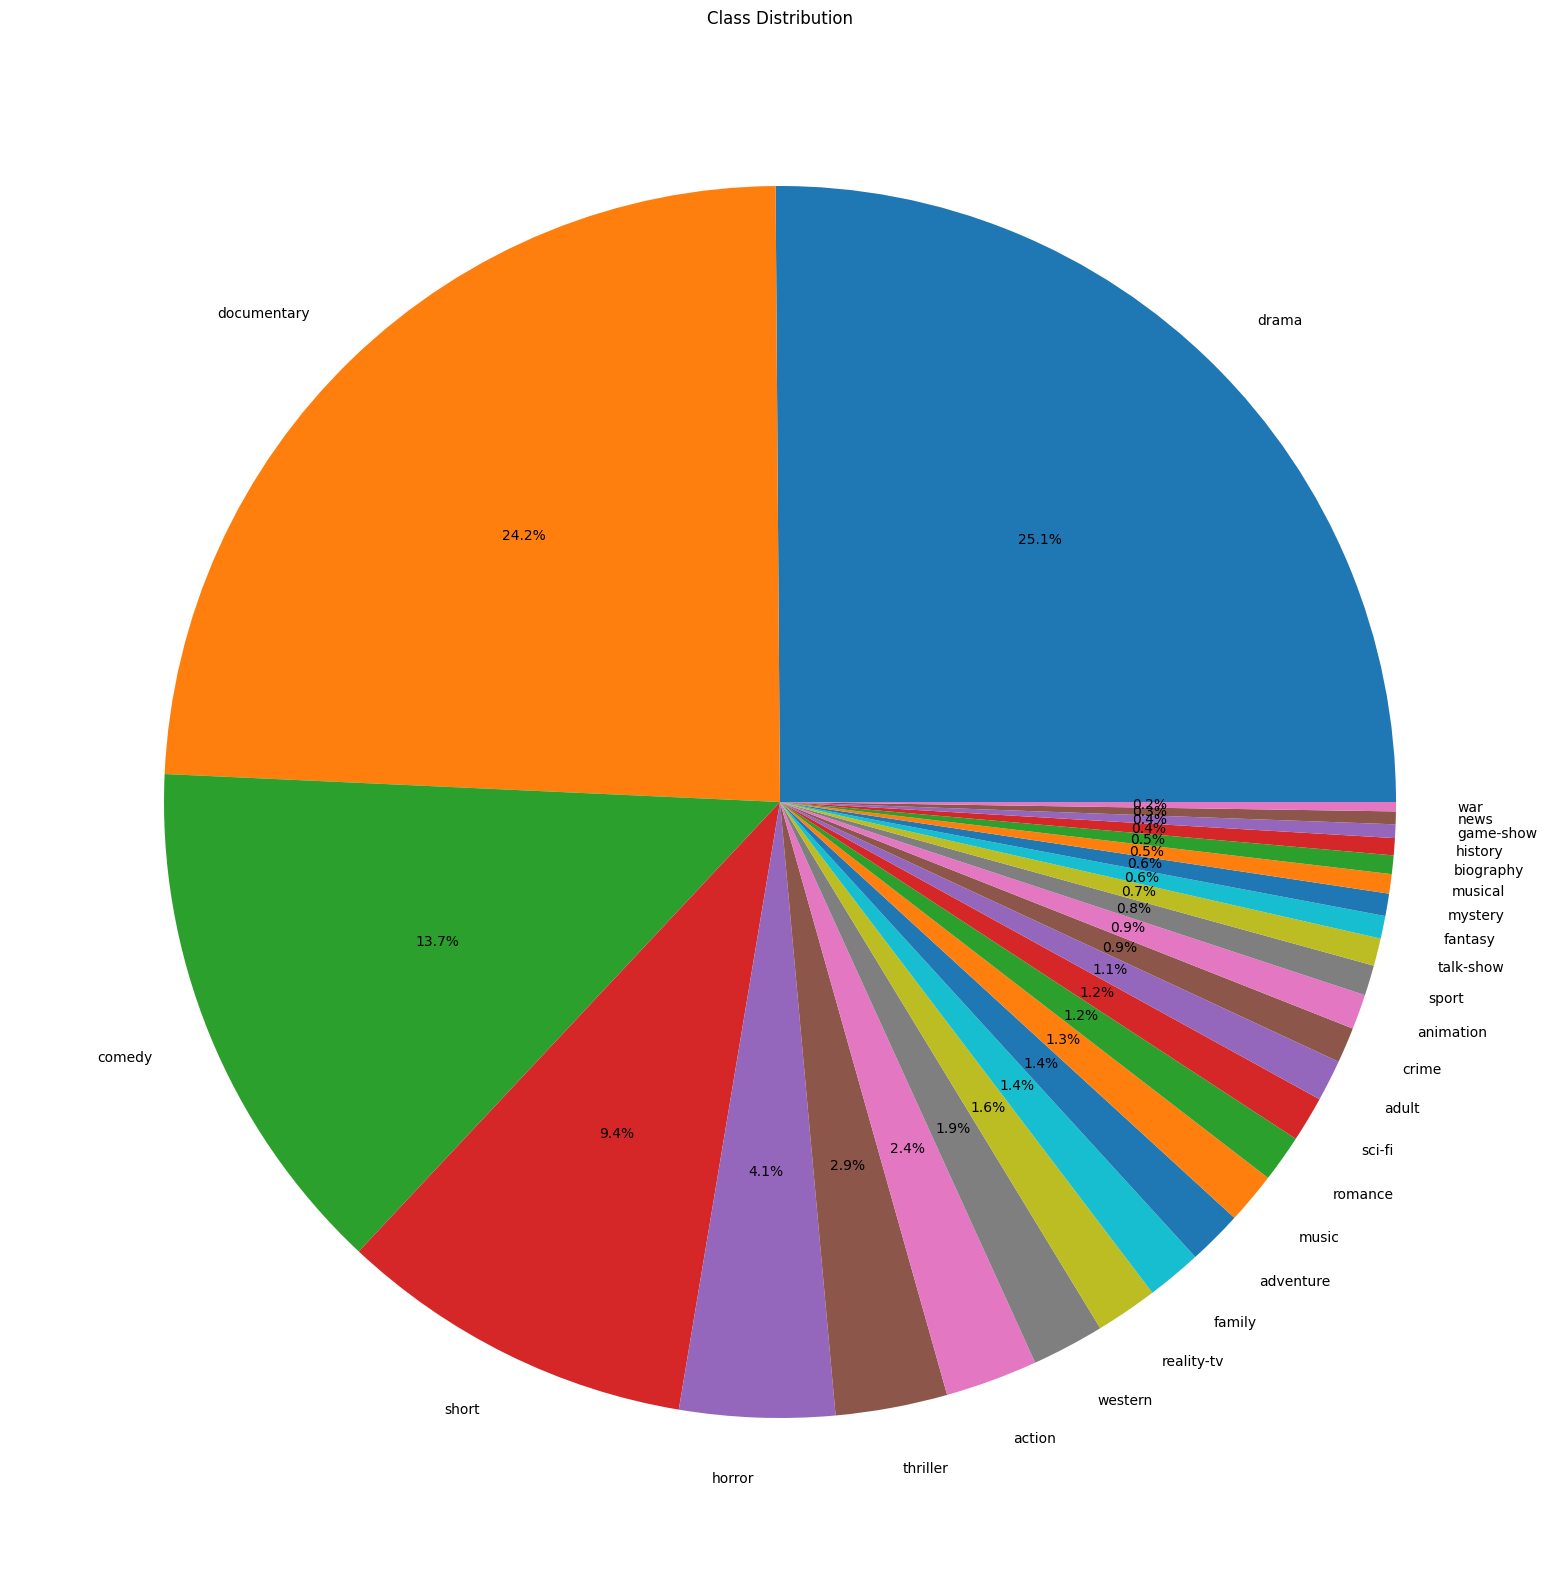

In [ ]:
plt.figure(figsize=(20, 20))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print("Classification Report: ")
print(classification_report(y_test, y_pred_logreg, zero_division=0))
print("Precision: ", precision_score(y_test, y_pred_logreg, average='macro', zero_division=0))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_logreg))

Accuracy:  0.5893542435424354
Classification Report: 
              precision    recall  f1-score   support

      action       0.48      0.29      0.36      1314
       adult       0.60      0.24      0.34       590
   adventure       0.61      0.18      0.28       775
   animation       0.51      0.07      0.12       498
   biography       0.00      0.00      0.00       264
      comedy       0.54      0.58      0.56      7446
       crime       0.37      0.04      0.07       505
 documentary       0.67      0.85      0.75     13096
       drama       0.55      0.77      0.64     13612
      family       0.50      0.10      0.16       783
     fantasy       0.57      0.06      0.11       322
   game-show       0.87      0.50      0.64       193
     history       0.00      0.00      0.00       243
      horror       0.65      0.58      0.61      2204
       music       0.68      0.46      0.55       731
     musical       0.33      0.02      0.04       276
     mystery       0.33    

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC(C=1)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Classification Report: ")
print(classification_report(y_test, y_pred_svm, zero_division=0))
print("Precision: ", precision_score(y_test, y_pred_svm, average='macro', zero_division=0))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy:  0.579409594095941
Classification Report: 
              precision    recall  f1-score   support

      action       0.39      0.32      0.35      1314
       adult       0.52      0.38      0.44       590
   adventure       0.41      0.22      0.28       775
   animation       0.30      0.14      0.19       498
   biography       0.05      0.00      0.01       264
      comedy       0.54      0.56      0.55      7446
       crime       0.21      0.07      0.11       505
 documentary       0.69      0.82      0.75     13096
       drama       0.57      0.72      0.64     13612
      family       0.34      0.14      0.19       783
     fantasy       0.29      0.11      0.15       322
   game-show       0.79      0.61      0.69       193
     history       0.19      0.02      0.04       243
      horror       0.60      0.61      0.60      2204
       music       0.60      0.50      0.55       731
     musical       0.26      0.08      0.12       276
     mystery       0.30     